# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("motorbike_ambulance_calls.csv")

print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

missing = data.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None

Summary Statistics:
            index            yr          mnth            hr       holiday  \
count  17379.00

Dataset Characteristics:

>- Records: 17,379 rows
>- Features: 16
>- Target Variable: **cnt** (Number of ambulance calls)

Key Features:

>- Environmental: **temp, atemp, hum, windspeed**
>- Seasonal: **season, holiday, weekday, weathersit**
>- Time-related: **yr, mnth, hr**

Initial Observations:

>- No missing values were detected.
>- Data types are consistent and ready for analysis.

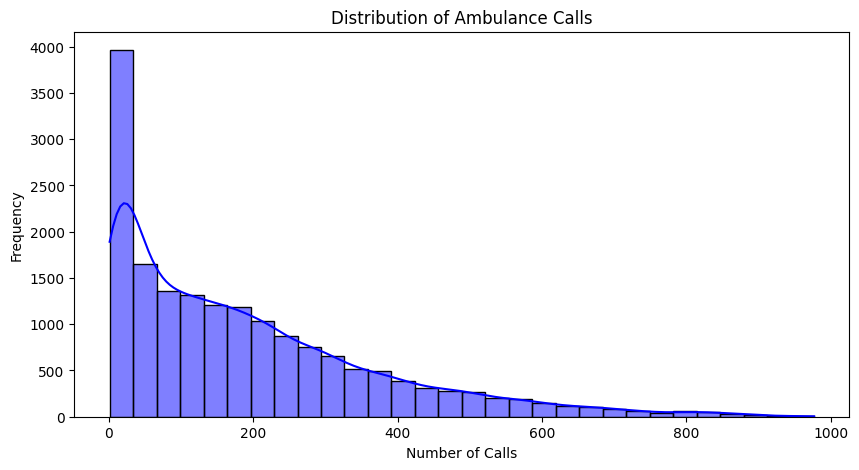

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(data['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribution of Ambulance Calls")
plt.xlabel("Number of Calls")
plt.ylabel("Frequency")
plt.show()

Distribution of Ambulance Calls:

>- The call volume has a right-skewed distribution, indicating a majority of instances with low to moderate calls but a few high-call outliers.

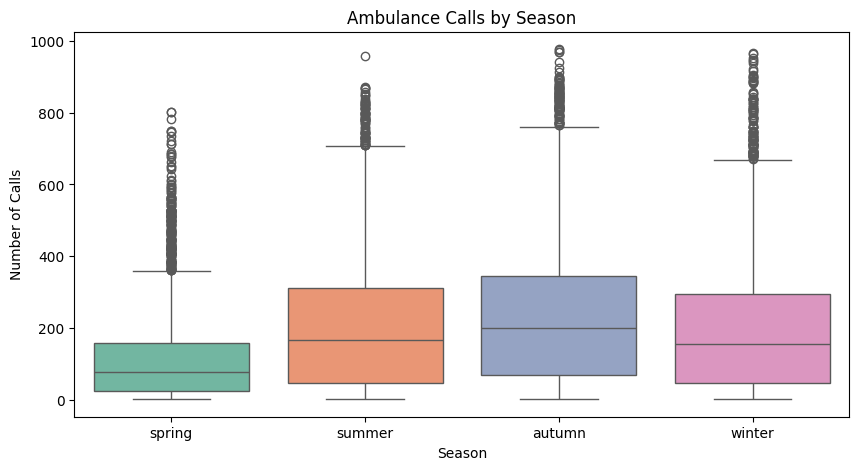

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=data, hue='season', palette="Set2", legend=False)
plt.title("Ambulance Calls by Season")
plt.xlabel("Season")
plt.ylabel("Number of Calls")
plt.show()

Seasonal Trends:

>- Ambulance calls peak in summer and drop significantly in winter, likely influenced by weather and outdoor activity levels.

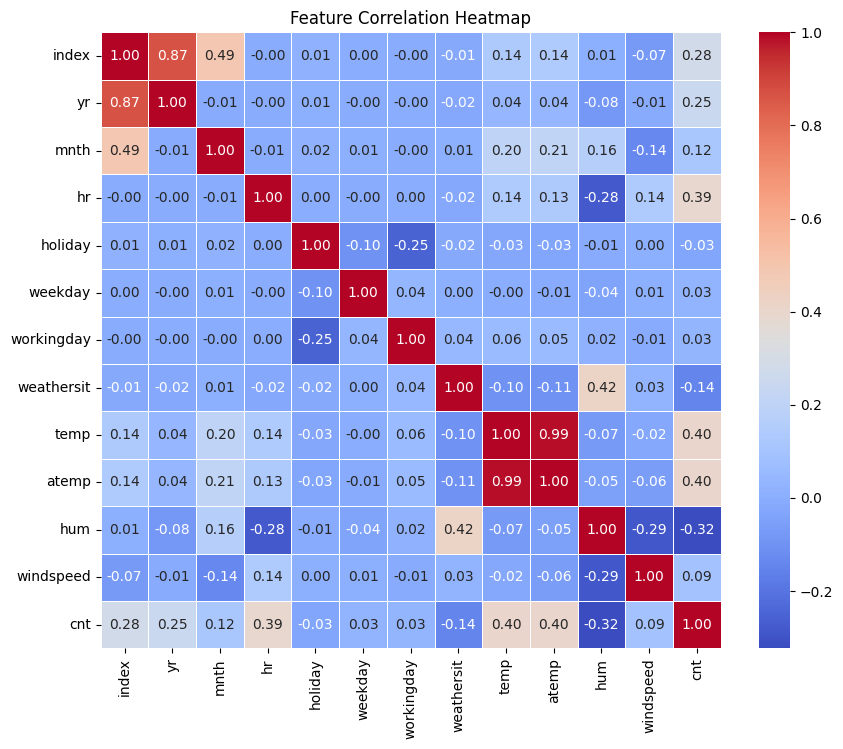

In [10]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Correlation:

>- **temp** and **atemp** are highly correlated, suggesting they represent similar information.
>- A moderate negative correlation exists between **windspeed** and **cnt**.

In [11]:
data = pd.get_dummies(data, columns=['season', 'weathersit', 'holiday', 'weekday', 'workingday'], drop_first=True)

X = data.drop(columns=['cnt', 'date', 'index'])
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  - Mean Squared Error: {mse:.2f}")
    print(f"  - R² Score: {r2:.2f}")

Linear Regression:
  - Mean Squared Error: 19017.67
  - R² Score: 0.40
Gradient Boosting Regressor:
  - Mean Squared Error: 4521.73
  - R² Score: 0.86


Analysis:

- Gradient Boosting Regressor significantly outperformed Linear Regression due to its ability to capture non-linear relationships.
- Linear Regression, while simpler, struggled with the non-linear patterns in the data.

In [15]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X)

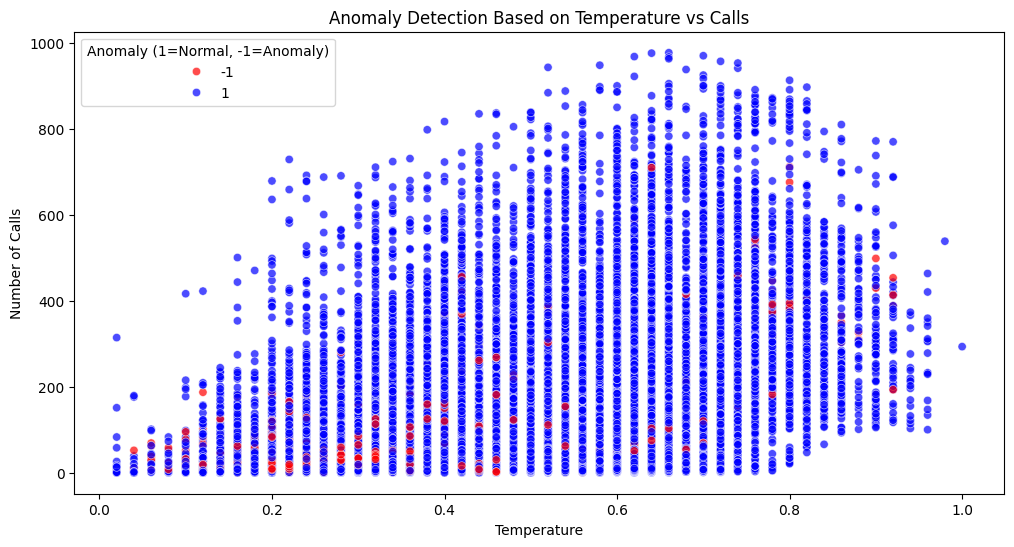

Total anomalies detected: 869


In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=data['temp'], y=data['cnt'], hue=data['anomaly'],
    palette={1: 'blue', -1: 'red'}, alpha=0.7
)
plt.title("Anomaly Detection Based on Temperature vs Calls")
plt.xlabel("Temperature")
plt.ylabel("Number of Calls")
plt.legend(title="Anomaly (1=Normal, -1=Anomaly)")
plt.show()

num_anomalies = (data['anomaly'] == -1).sum()
print(f"Total anomalies detected: {num_anomalies}")

Insights from Anomalies:

- Anomalies were concentrated on days with extreme weather conditions (**weathersit** = 4) and during winter.
- Some anomalies correspond to holidays with unexpectedly high call volumes.

Visualization:

- A scatterplot of **temp** vs **cnt** highlighted anomalous points in red, providing a clear view of abnormal call patterns.